# Execução do notebook de pre-processamento

Essa execução irá carregar aqui todas as importações e variaveis de ambiente criadas no notebook **preprocessing.ipynb**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

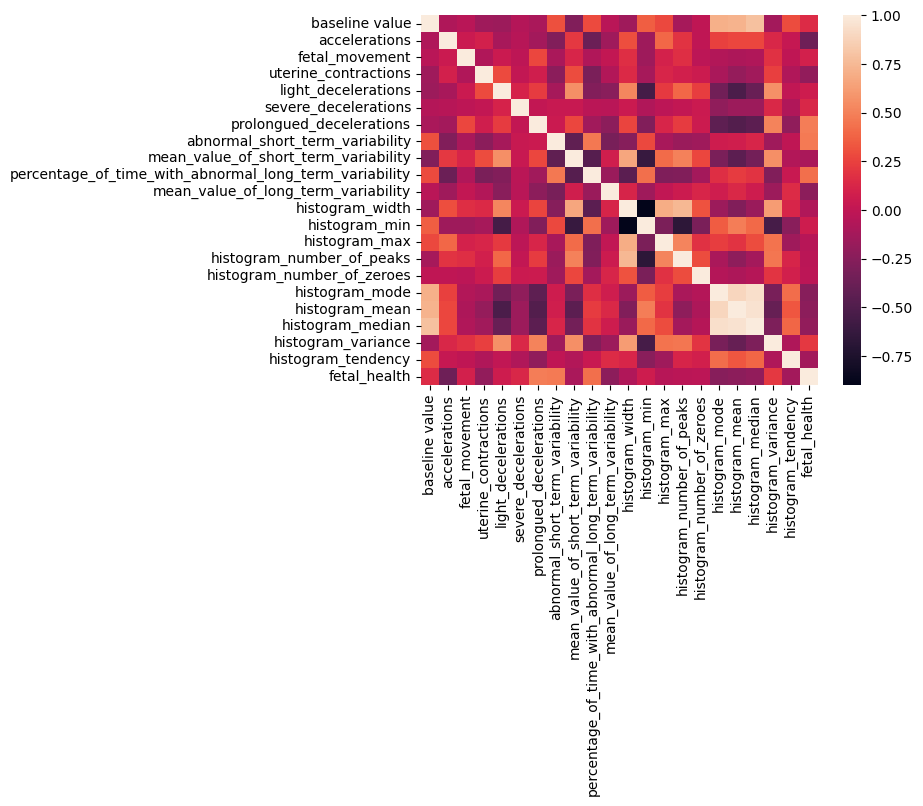

In [1]:
%run preprocessing.ipynb

# Random Forest Classifier

## Quantidade do alvo fetal_health

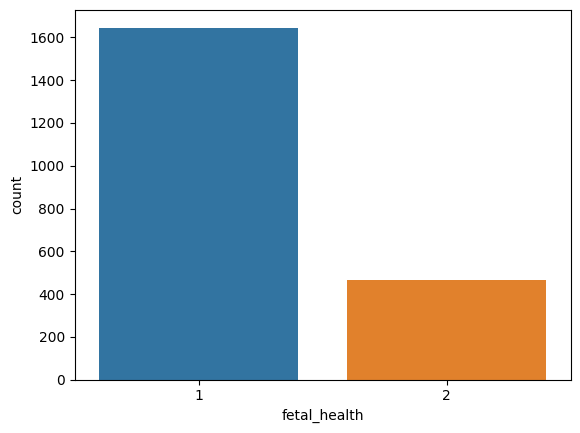

In [2]:
sns.countplot(data=fetal_health, x="fetal_health")
plt.show()

In [3]:
fetal_health.fetal_health.value_counts(normalize=True)

1    0.778987
2    0.221013
Name: fetal_health, dtype: float64

## Pipeline

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

steps = [
    ("ss", StandardScaler()),
    ("rf", RandomForestClassifier()),
]

pipe = Pipeline(steps)

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = make_scorer(recall_score, pos_label=2)

## Treinamento com Grid Search CV

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "rf__n_estimators": range(100, 1_000, 100),
    "rf__criterion": ["gini", "entropy", "log_loss"],
    "rf__max_depth": range(3, 8),
    "rf__class_weight": ["balanced", "balanced_subsample"],
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=splitter,
    scoring=score,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__class_weight': ['balanced', 'balanced_subsample'],
                         'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': range(3, 8),
                         'rf__n_estimators': range(100, 1000, 100)},
             scoring=make_scorer(recall_score, pos_label=2))

## Melhores parâmetros

In [7]:
grid.best_estimator_, grid.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('rf',
                  RandomForestClassifier(class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=6,
                                         n_estimators=500))]),
 {'rf__class_weight': 'balanced_subsample',
  'rf__criterion': 'entropy',
  'rf__max_depth': 6,
  'rf__n_estimators': 500})

## Predição da base de Treino

              precision    recall  f1-score   support

           1       0.99      0.96      0.97      1316
           2       0.87      0.95      0.91       374

    accuracy                           0.96      1690
   macro avg       0.93      0.96      0.94      1690
weighted avg       0.96      0.96      0.96      1690



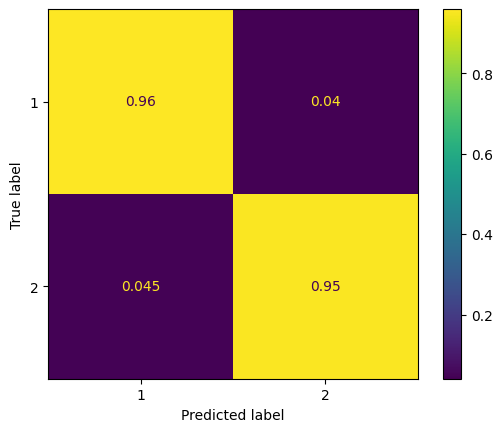

In [8]:
print_report(grid, X_train, y_train, normalize="true")

## Predição da base de teste

              precision    recall  f1-score   support

           1       0.98      0.96      0.97       330
           2       0.87      0.92      0.90        93

    accuracy                           0.95       423
   macro avg       0.92      0.94      0.93       423
weighted avg       0.95      0.95      0.95       423



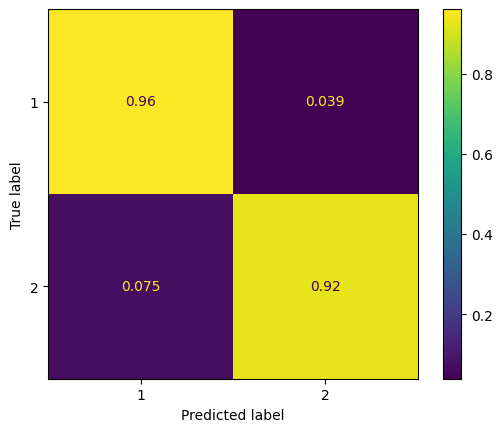

In [9]:
print_report(grid, X_test, y_test, normalize="true")